In [2]:
import pandas as pd
data = pd.read_csv("C:/Users/Lenovo/Desktop/College/Sem 6/ML Ass/gld_price_data.csv")

In [3]:
data.shape

(2290, 6)

In [4]:
print(data.head)
print(data.dtypes)

<bound method NDFrame.head of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>
Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float

In [5]:
data.isnull().sum() 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [31]:
#Checking different percentiles
pd.DataFrame(data['USO']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,USO
count,2290.000000
mean,31.842221
std,19.523517
min,7.960000
1%,8.927800
10%,10.568000
30%,18.650000
50%,33.869999
75%,37.827501
90%,41.333002


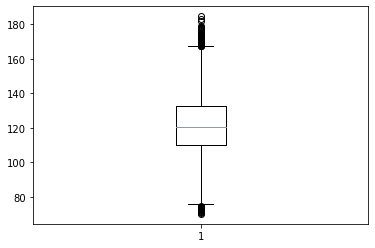

In [7]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['GLD'])
plt.show()

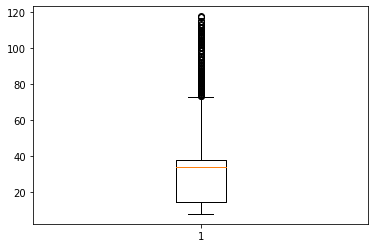

In [8]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['USO'])
plt.show()

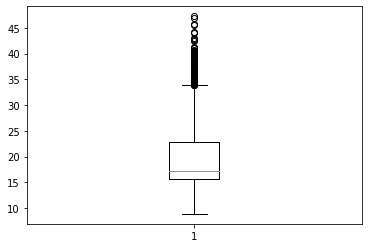

In [9]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['SLV'])
plt.show()

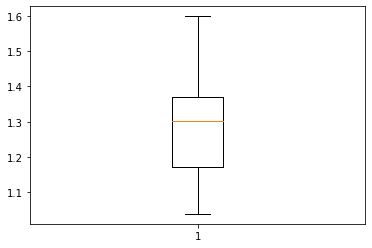

In [10]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['EUR/USD'])
plt.show()

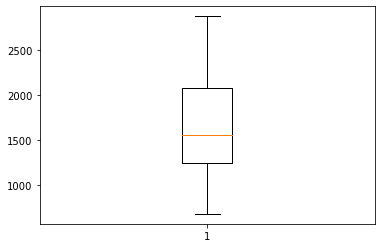

In [11]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['SPX'])
plt.show()

In [12]:
#Checking Outlier by definition and treating outliers

#getting median Age
GLD_col_df = pd.DataFrame(data['GLD'])
GLD_median = GLD_col_df.median()

#getting IQR of Age column
Q3 = GLD_col_df.quantile(q=0.75)
Q1 = GLD_col_df.quantile(q=0.25)
IQR = Q3-Q1

#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

#Finding and treating outliers - both lower and upper end
data.loc[data['GLD']>IQR_UL , 'GLD'] = int(GLD_col_df.quantile(q=0.90))
data.loc[data['GLD']<IQR_LL , 'GLD'] = int(GLD_col_df.quantile(q=0.01))

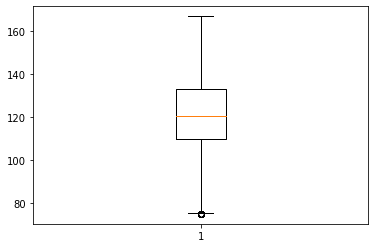

In [13]:
#Check max age value now
max(data['GLD'])
plt.boxplot(data['GLD'])
plt.show()

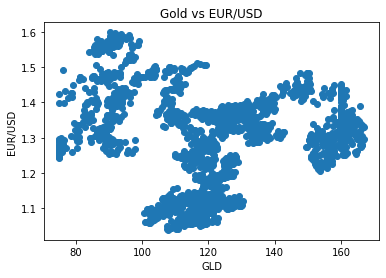

In [14]:
x = data["GLD"]
y=  data["EUR/USD"]
plt.scatter(x, y)
plt.title('Gold vs EUR/USD')
plt.xlabel('GLD')
plt.ylabel('EUR/USD')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

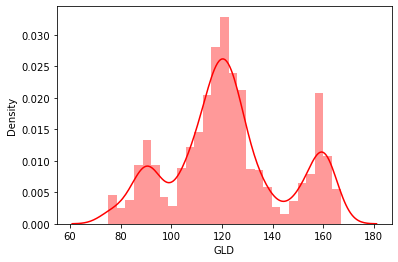

In [16]:
import seaborn as sns
sns.distplot(data['GLD'], color='red')

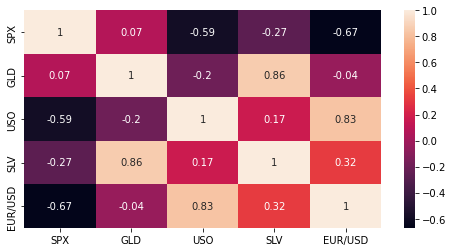

In [17]:
#check correltion matrix - to check the strength of variation bwtween two variables
correlation_matrix= data.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True)
fgr.savefig("myimage.png")

In [18]:
X = data.drop(['Date', 'GLD'], axis=1)   #Features
Y = data['GLD']    #Target

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.1, random_state = 0)
model = LinearRegression()
model.fit(X_train, Y_train)
accuracy = model.score(X_test,Y_test)
print(accuracy*100,'%')

83.33354918388221 %


In [22]:
import numpy as np

y_pred = model.predict(X_test)

print('R2_score : ',metrics.r2_score(y_pred,Y_test))
print('MSE : ',metrics.mean_squared_error(y_pred,Y_test))

R2_score :  0.8236381589294605
MSE :  79.28293640338522


In [23]:
X_test #the test data - predictors

,SPX,USO,SLV,EUR/USD
1255,1692.770020,36.880001,20.980000,1.351698
2100,2425.530029,9.270000,14.990000,1.147394
711,1309.660034,42.049999,36.119999,1.410596
1328,1838.699951,33.689999,19.510000,1.361804
53,1298.420044,82.290001,18.250999,1.563893
...,...,...,...,...
1827,2066.659912,9.600000,14.340000,1.140498
746,1316.280029,39.279999,35.770000,1.409900
962,1338.349976,35.610001,27.420000,1.283203
703,1296.390015,40.910000,35.009998,1.393456


In [24]:
Y_test #the actual values in test data - target column

1255    128.789993
2100    115.620003
711     139.220001
1328    120.930000
53       93.040001
           ...    
1827    116.940002
746     148.589996
962     151.330002
703     138.860001
1146    154.000000
Name: GLD, Length: 229, dtype: float64

In [25]:
y_pred

array([123.35331704, 119.18599536, 164.36402287, 120.65019774,
        99.32394587, 141.9060249 , 124.6855032 , 109.91047834,
       139.58298859, 113.20660895, 112.07380269, 121.42430603,
        94.10114749, 145.27505014, 122.976612  , 116.33197208,
        91.35406032,  95.8308489 ,  96.87223714, 118.60835987,
        82.6145119 , 118.04205769, 122.41090392, 174.22466353,
       172.46016873, 164.75568691, 116.74022561, 149.68225406,
       126.68549616, 114.35090573, 119.77474914, 111.33477599,
       122.56239537, 122.02995765, 103.83263203, 118.96785316,
        80.71992464, 116.73577287, 122.46195605, 165.11227343,
       105.52126712, 136.56264706, 106.18546221, 143.12398937,
       138.067021  , 160.76649987, 120.87455343, 147.17513425,
       147.68892033, 123.00962034, 116.44289364, 109.41781661,
       117.12227205, 111.14466862, 139.59885451, 116.29611705,
       115.43754832,  88.39798234, 141.76072786, 121.02626917,
        95.4924892 , 116.74077559,  81.18500389, 191.87

In [26]:
print(model.intercept_ ) #checking the intercept of model equation
print(model.coef_)   #Checking the coefficients of model equation

69.81906580324966
[ 7.15821702e-03 -2.41908638e-01  3.00933825e+00 -9.46756573e+00]


In [27]:
Y_test = [1, 2, 3]
y_pred = [1, 2, 3]
metrics.r2_score(Y_test, y_pred)

1.0